# Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

## Attribute Information

Input variables (based on physicochemical tests):  
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol   
Output variable (based on sensory data):  
12 - quality (score between 0 and 10)  
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.  
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.  
You need to build a classification model.

## Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

In [72]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.40              0.70         0.00            1.90       0.08   
1              7.80              0.88         0.00            2.60       0.10   
2              7.80              0.76         0.04            2.30       0.09   
3             11.20              0.28         0.56            1.90       0.07   
4              7.40              0.70         0.00            1.90       0.08   
...             ...               ...          ...             ...        ...   
1594           6.20              0.60         0.08            2.00       0.09   
1595           5.90              0.55         0.10            2.20       0.06   
1596           6.30              0.51         0.13            2.30       0.08   
1597           5.90              0.65         0.12            2.00       0.07   
1598           6.00              0.31         0.47            3.60       0.07   

      free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                   11.00                 34.00     1.00 3.51       0.56   
1                   25.00                 67.00     1.00 3.20       0.68   
2                   15.00                 54.00     1.00 3.26       0.65   
3                   17.00                 60.00     1.00 3.16       0.58   
4                   11.00                 34.00     1.00 3.51       0.56   
...                   ...                   ...      ...  ...        ...   
1594                32.00                 44.00     0.99 3.45       0.58   
1595                39.00                 51.00     1.00 3.52       0.76   
1596                29.00                 40.00     1.00 3.42       0.75   
1597                32.00                 44.00     1.00 3.57       0.71   
1598                18.00                 42.00     1.00 3.39       0.66   

      alcohol  quality  
0        9.40        5  
1        9.80        5  
2        9.80        5  
3        9.80        6  
4        9.40        5  
...       ...      ...  
1594    10.50        5  
1595    11.20        6  
1596    11.00        6  
1597    10.20        5  
1598    11.00        6  

[1599 rows x 12 columns]

In [3]:
df.describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count    1599.00              1599.00               1599.00  1599.00 1599.00   
mean        0.09                15.87                 46.47     1.00    3.31   
std         0.05                10.46                 32.90     0.00    0.15   
min         0.01                 1.00                  6.00     0.99    2.74   
25%         0.07                 7.00                 22.00     1.00    3.21   
50%         0.08                14.00                 38.00     1.00    3.31   
75%         0.09                21.00                 62.00     1.00    3.40   
max         0.61                72.00                289.00     1.00    4.01   

       sulphates  alcohol  quality  
count    1599.00  1599.00  1599.00  
mean        0.66    10.42     5.64  
std         0.17     1.07     0.81  
min         0.33     8.40     3.00  
25%         0.55     9.50     5.00  
50%         0.62    10.20     6.00  
75%         0.73    11.10     6.00  
max         2.00    14.90     8.00

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

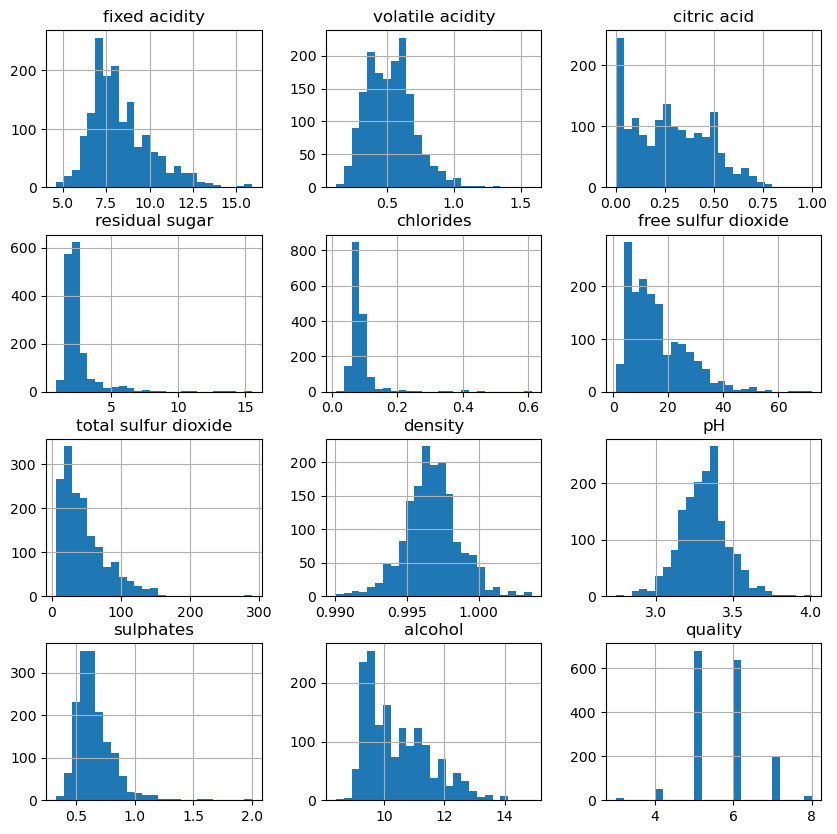

In [6]:
df.hist(bins=25,figsize=(10,10));

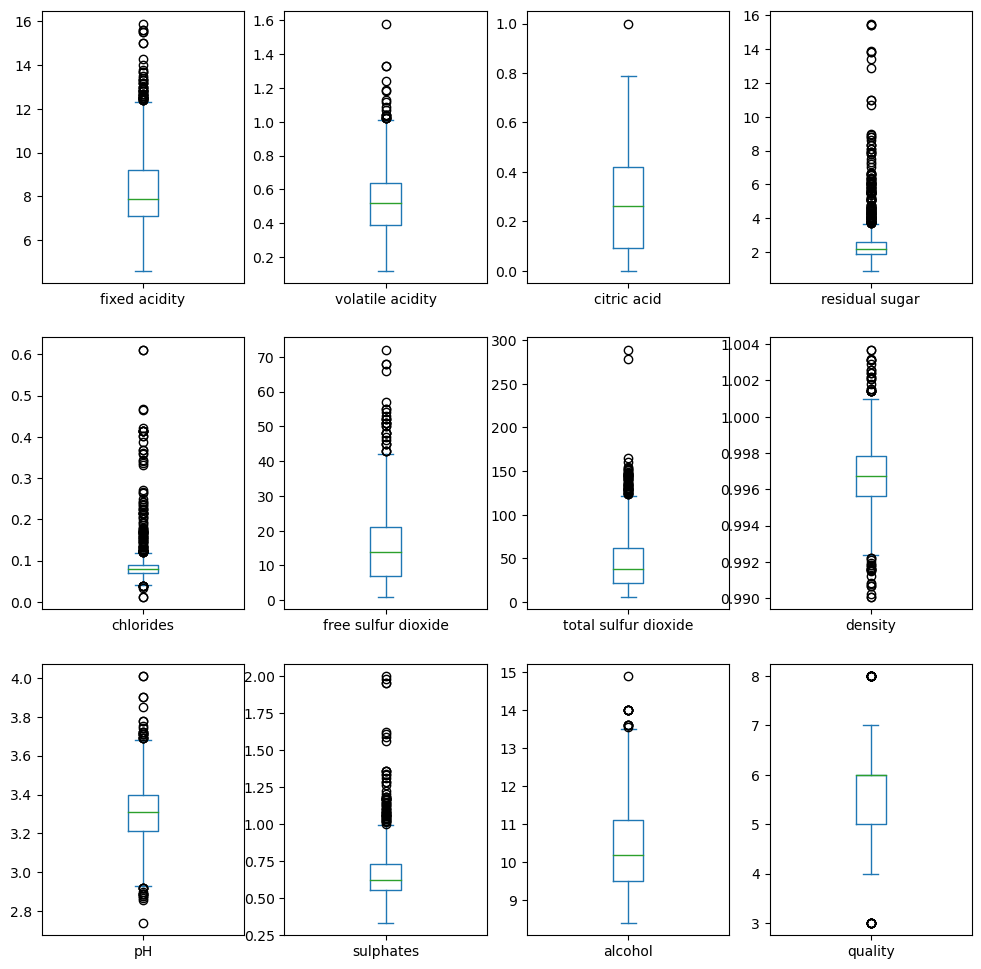

In [7]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(12,12));

From the barchar we can see that there are outliers thoughout the data set.

In [8]:
outliers=df[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
z=np.abs(zscore(outliers))

df_out = df[(z<3).all(axis=1)]

print(((df.shape[0]-df_out.shape[0])/df.shape[0])*100)

8.818011257035648


In [9]:
df=df_out

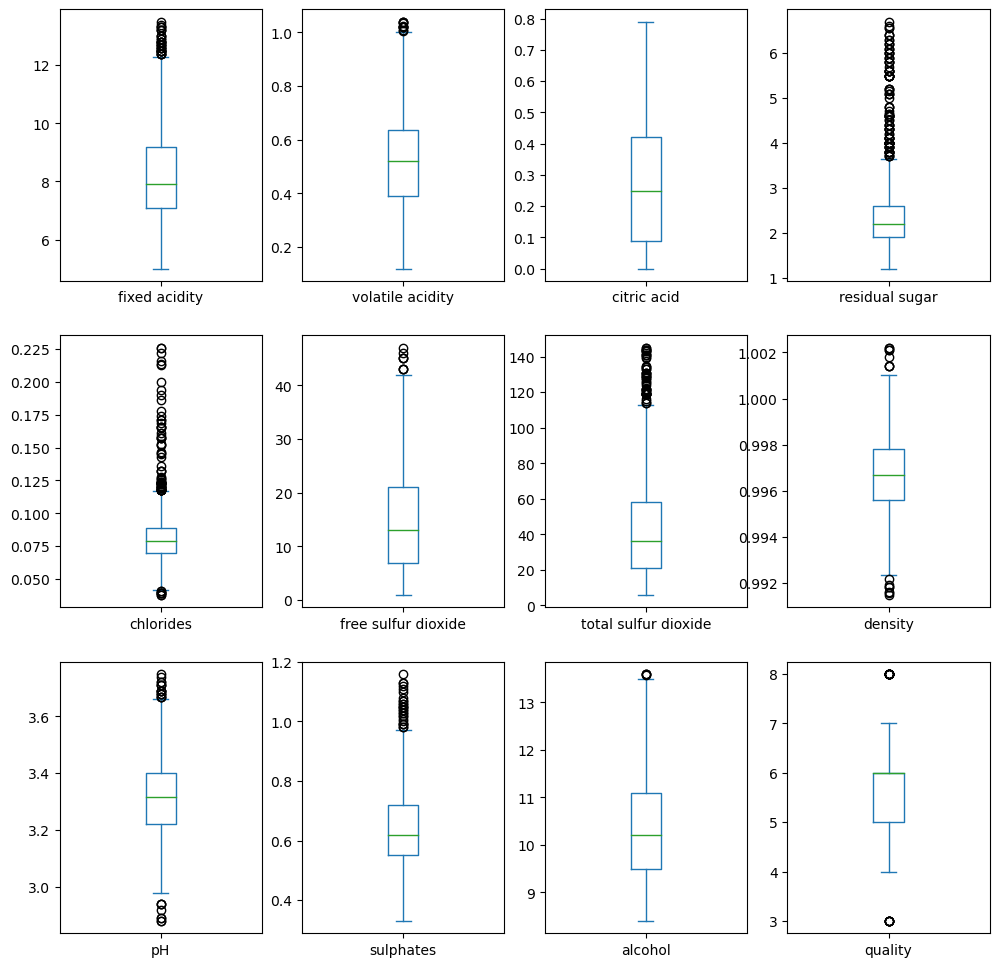

In [10]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(12,12));

There are still outliers in the boxplot, but those should be resolved with data normalization.

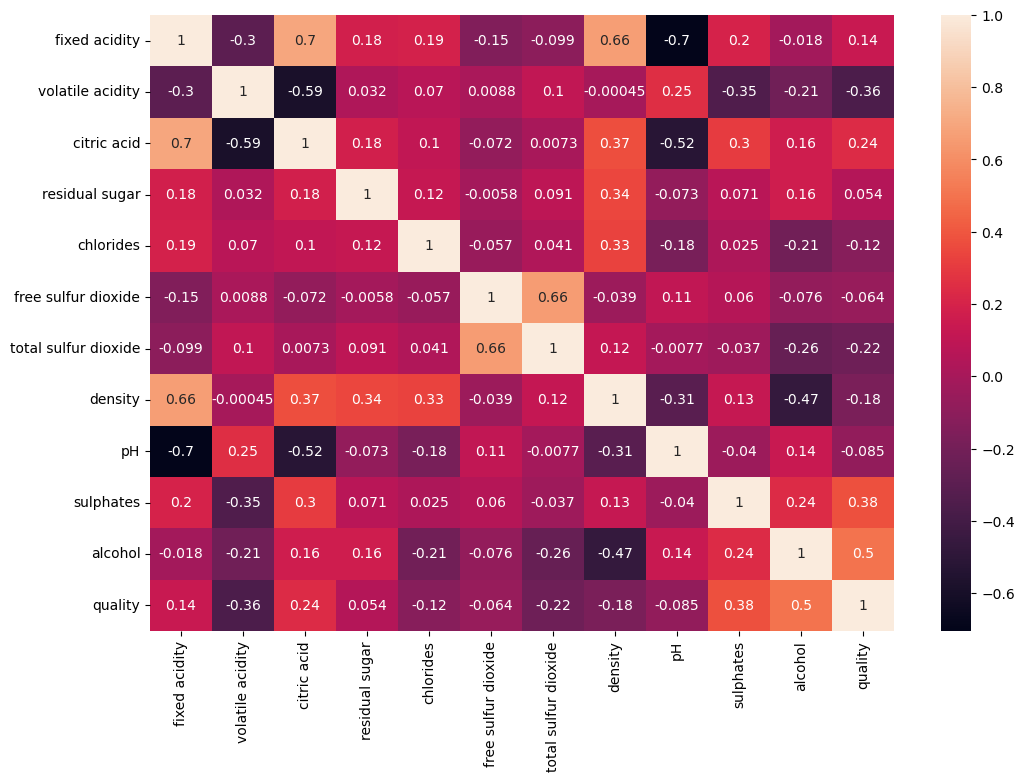

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True);

Fixed acidity has a a high correlation with multiple variables, therefore it will be removed and correlation reexamined. 

In [12]:
df=df.drop(["fixed acidity"], axis=1)

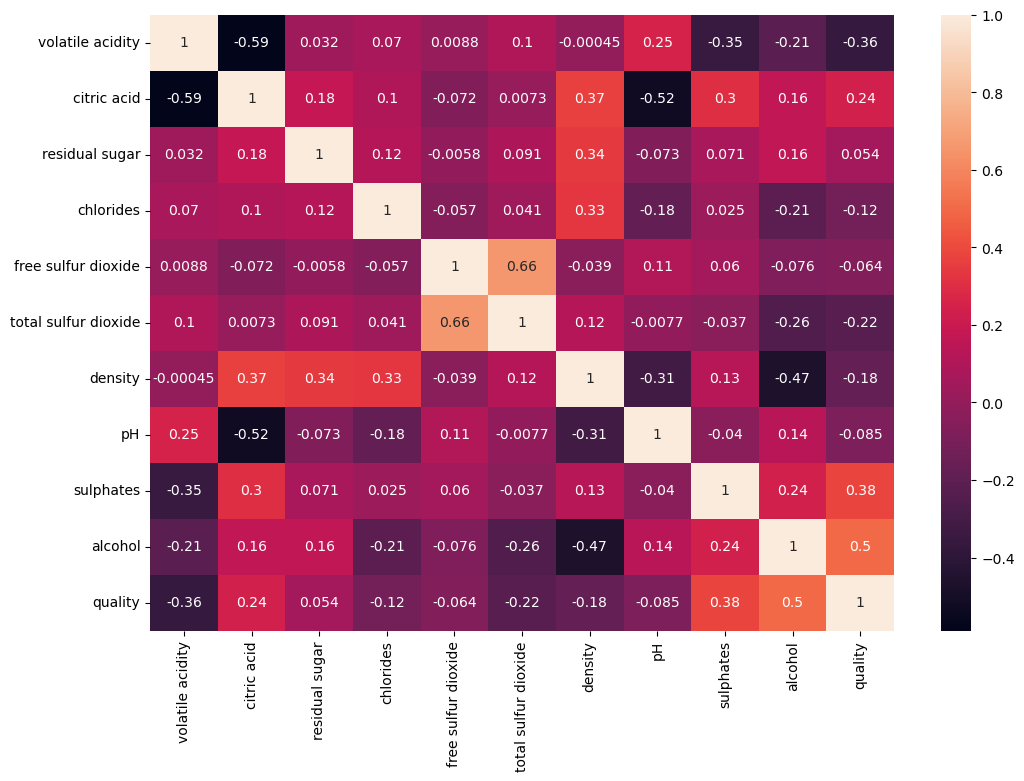

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True);

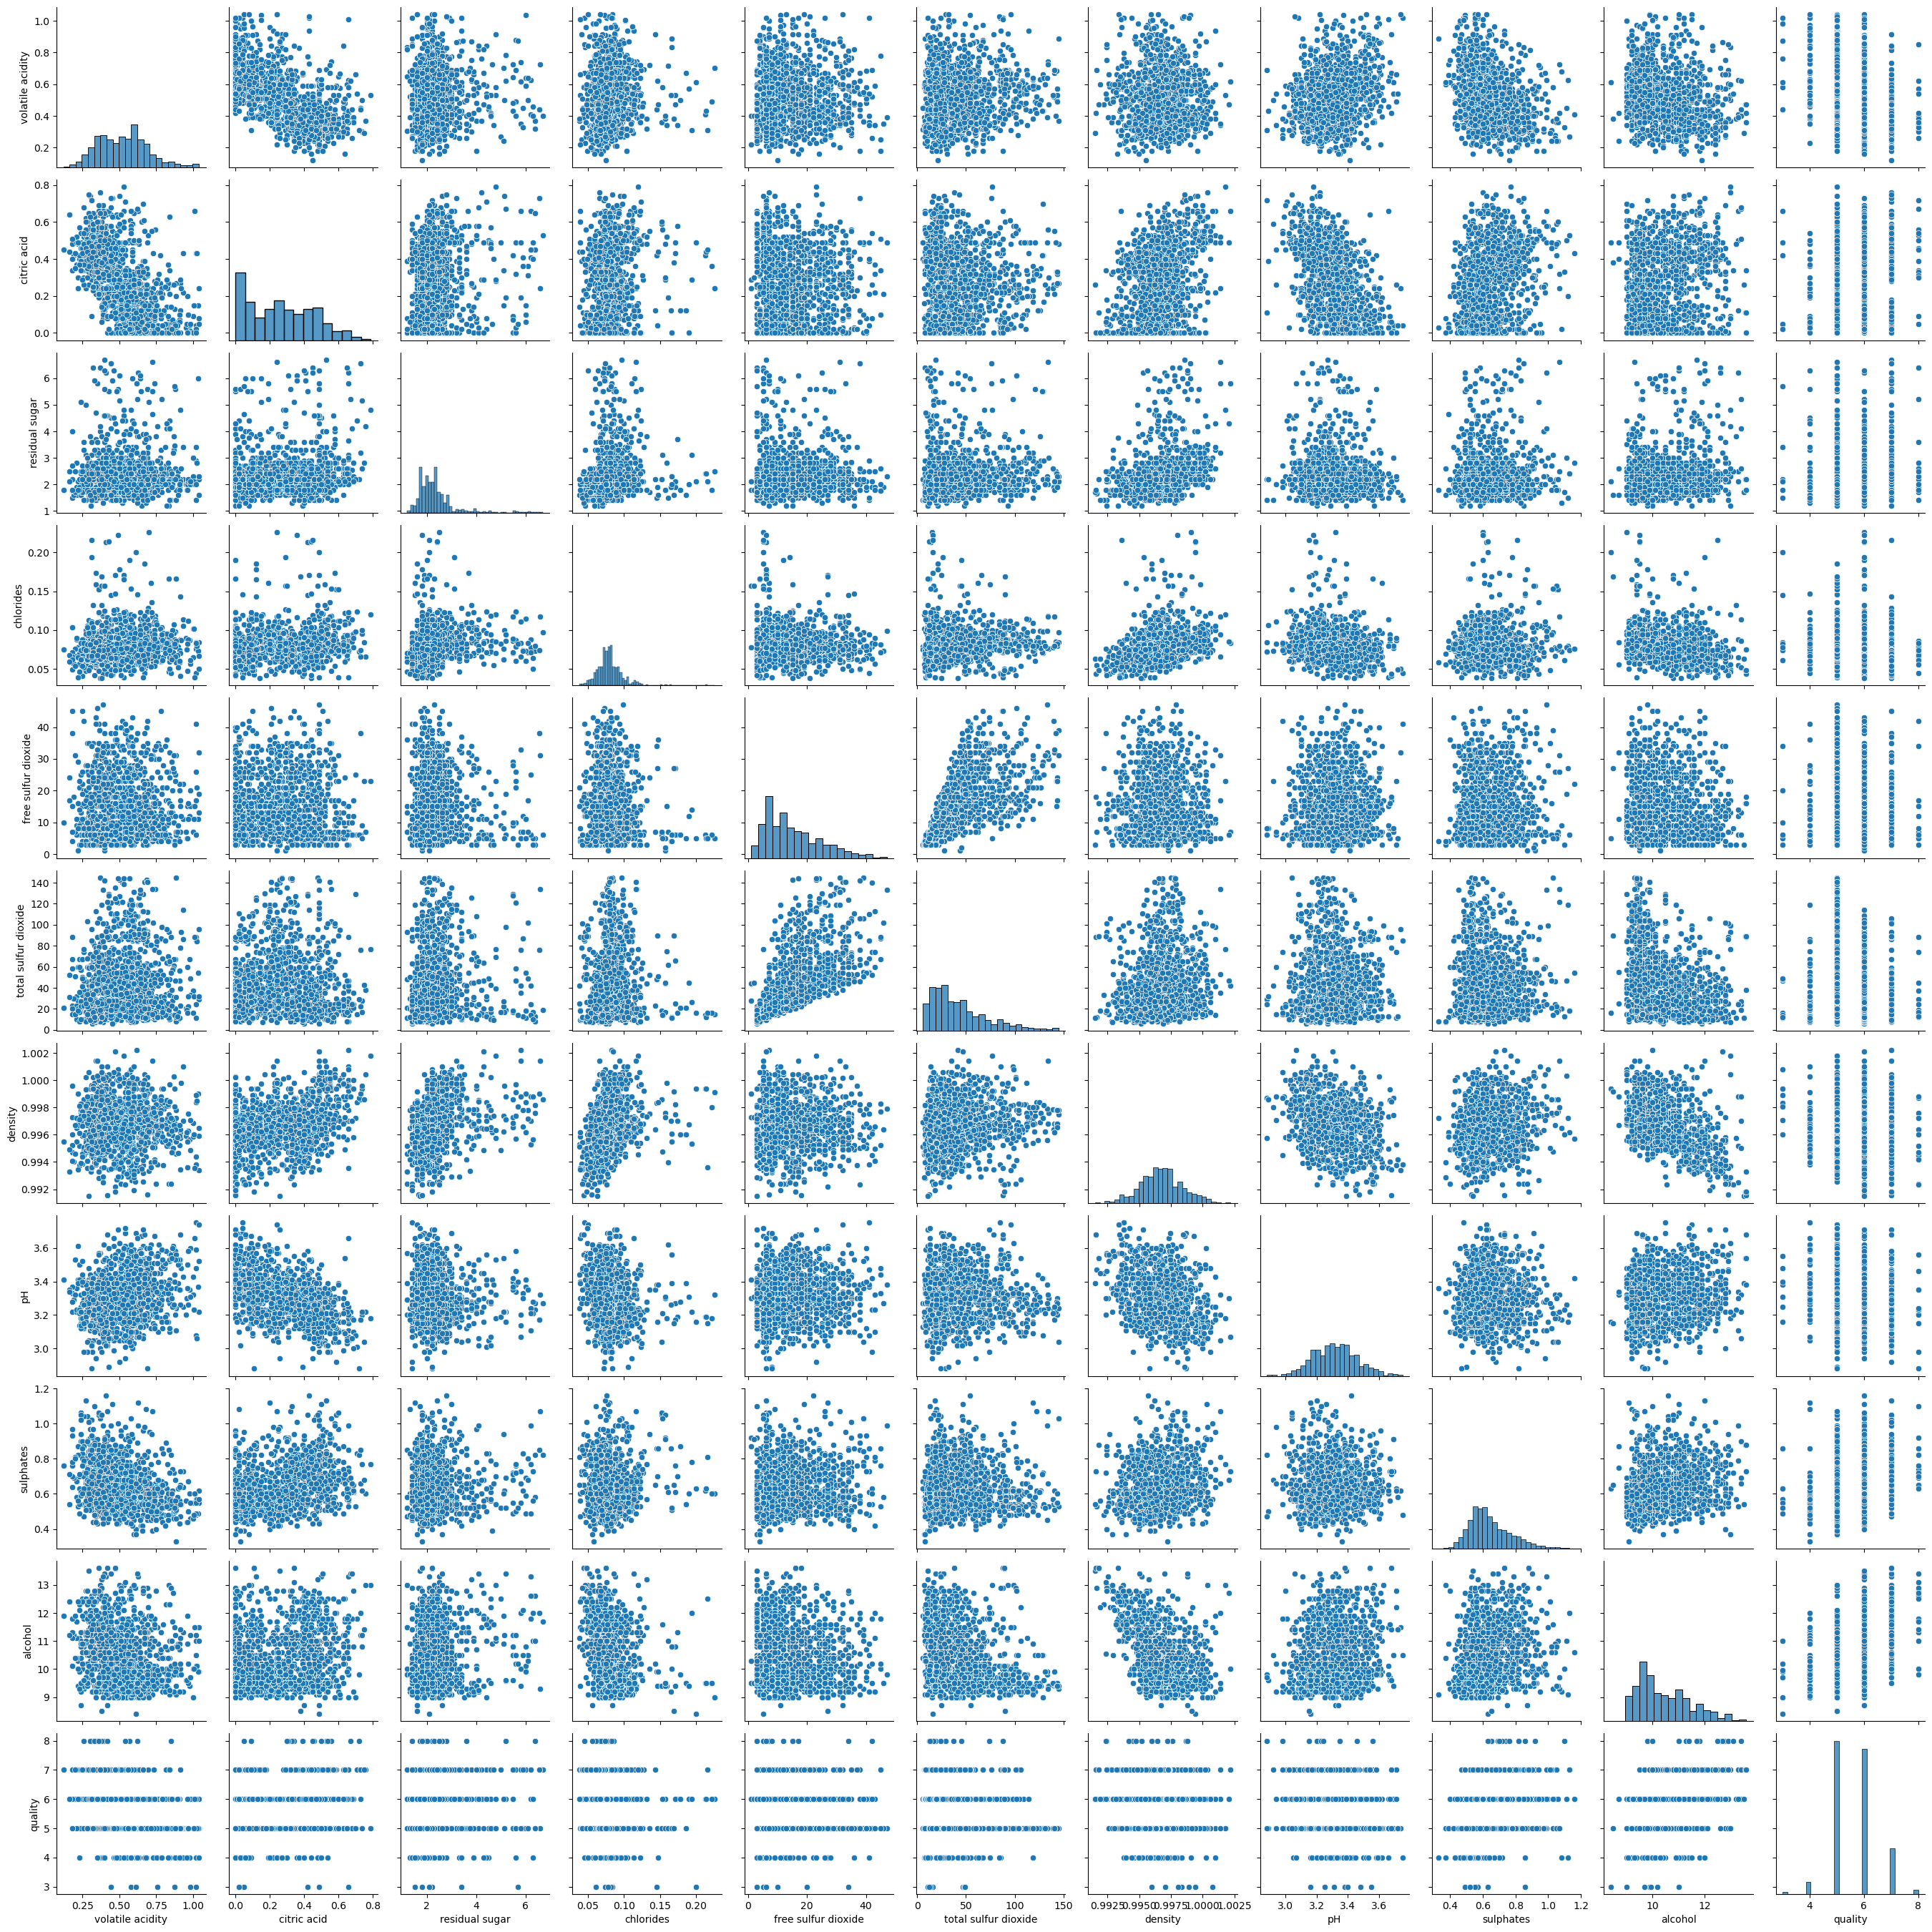

In [14]:
sns.pairplot(df);

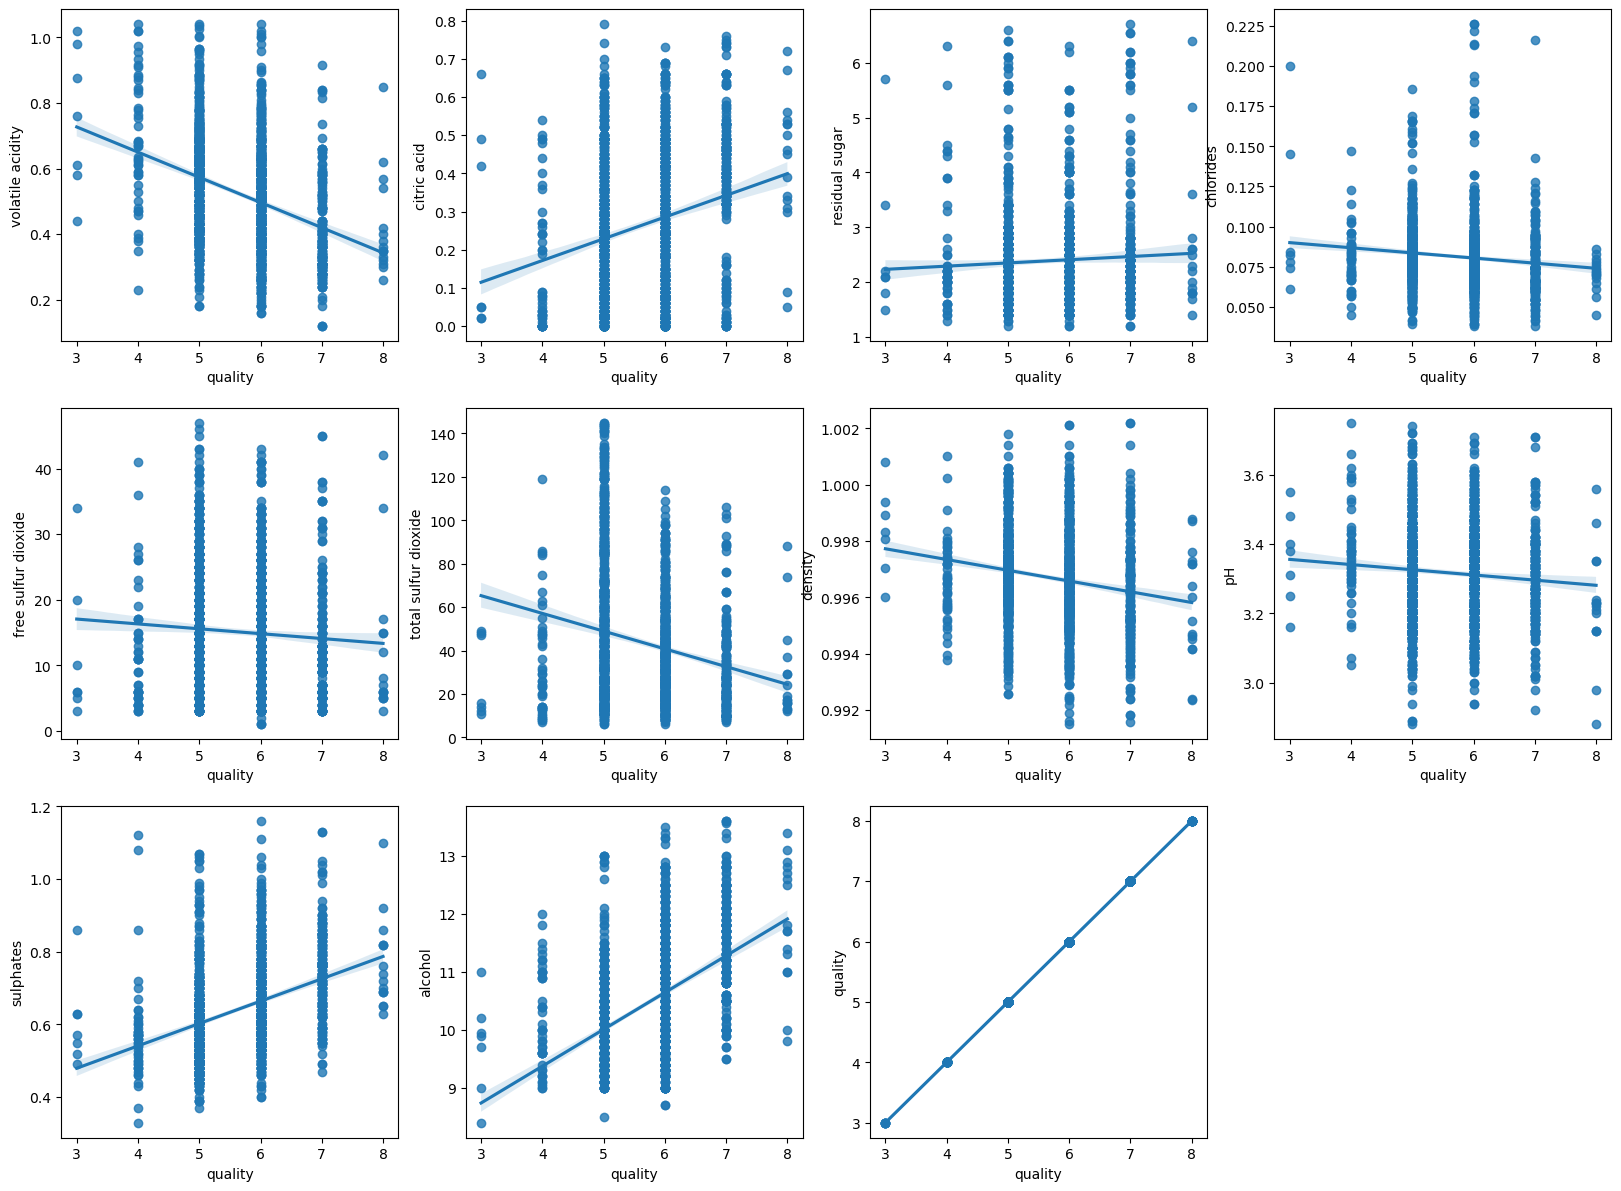

In [15]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=11:
        plt.subplot(5,4,p)
        sns.regplot(x='quality', y=i, data=df)
        plt.xlabel('quality')
        plt.ylabel(i)
    p+=1
plt.show()

In [16]:
df_skew = df.skew()
df_skew

volatile acidity       0.39
citric acid            0.29
residual sugar         2.45
chlorides              2.31
free sulfur dioxide    0.87
total sulfur dioxide   1.19
density                0.06
pH                     0.11
sulphates              0.89
alcohol                0.76
quality                0.25
dtype: float64

In [17]:
# Removing skewness using cuberoot
for index, value in df_skew.iteritems():
    if value > 0.5:
        df[index] = np.cbrt(df[index])

In [18]:
df_skew = df.skew()

In [19]:
for index, value in df_skew.iteritems():
    if value > 0.5:
        df[index] = np.cbrt(df[index])

In [20]:
df.skew()

volatile acidity       0.39
citric acid            0.29
residual sugar         1.36
chlorides              0.70
free sulfur dioxide    0.13
total sulfur dioxide   0.34
density                0.06
pH                     0.11
sulphates              0.41
alcohol                0.61
quality                0.25
dtype: float64

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values              Features
0        1.85      volatile acidity
1        2.83           citric acid
2        1.54        residual sugar
3        1.22             chlorides
4        2.55   free sulfur dioxide
5        2.76  total sulfur dioxide
6        2.77               density
7        1.53                    pH
8        1.34             sulphates
9        2.42               alcohol

In [21]:
x = df.drop(['quality'], axis=1)
y = df[['quality']]

In [30]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 41)

In [32]:
clf = LazyClassifier(verbose = 0, ignore_warnings=True, custom_metric=None)
models, prediction = clf.fit(xtrain, xtest, ytrain, ytest)
print(models);

 93%|████████████████████████████████████████████████████████████████████████████▎     | 27/29 [00:03<00:00,  8.70it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 1093, number of used features: 10
[LightGBM] [Info] Start training from score -5.204922
[LightGBM] [Info] Start training from score -3.441333
[LightGBM] [Info] Start training from score -0.885214
[LightGBM] [Info] Start training from score -0.882999
[LightGBM] [Info] Start training from score -2.069428
[LightGBM] [Info] Start training from score -4.598786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  8.42it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

From the results I'm choosing RandomForestClassifier because processing time is not an issue.

In [42]:
rand_clf = RandomForestClassifier(random_state=41)

<IPython.core.display.Javascript object>

In [54]:
rand_clf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=41)

In [58]:
grid_param = {"n_estimators" : [90, 100, 115, 130],
              'criterion': ['gini','entropy'],
              'max_depth' : range(2, 20, 1),
              'min_samples_leaf' : range(1, 10, 1),
              'min_samples_split' : range(2, 10, 1),
              'max_features' : ['auto', 'log2']
             }

In [59]:
grid_search = GridSearchCV(estimator=rand_clf, param_grid=grid_param, cv=5, n_jobs=-1, verbose=3)

<IPython.core.display.Javascript object>

In [60]:
grid_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=41), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [62]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 90}

In [70]:
Final_model = RandomForestClassifier(criterion='gini', max_depth=18, max_features='log2', min_samples_leaf=1, min_samples_split=4, n_estimators=90, random_state=39)

<IPython.core.display.Javascript object>

In [73]:
Final_model.fit(xtrain,ytrain)
pred = Final_model.predict(xtest)
acc = accuracy_score(ytest,pred)
print(acc*100)

70.68493150684931
